In [1]:
# import numpy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Succession of a forest with initial population of 100 trees over 50 years
# 1 beech, 20 maples, 79 other
# we will use a transition matrix to model the changes in tree types over time
# There is a 0.8 probability that a beech sapling grows under a beech, 0.25 probability that a maple sapling grows under a beech, and 0.1 probability that other saplings grow under a beech.
# There is a 0.1 probability that a beech sapling grows under a maple, 0.15 probability that a maple sapling grows under a maple, and 0.25 probability that other saplings grow under a maple.
# There is a 0.1 probability that a beech sapling grows under other trees, 0.6 probability that a maple sapling grows under other trees, and 0.65 probability that other saplings grow under other trees.
# create a definition for the number of trees a definition to calculate and return the population of each tree type and the total population for each year with an initial population of 1 beech, 20 maples, and 79 other trees
def forest_succession(years, initial_population):

# define the transition matrix with initial populations of 1 beech, 20 maples, and 79 other trees over 50 years
# this is a matrix I made with CoPilot suggestions and no copy-pasting from previous assignments
    transition_matrix = np.array([[0.8, 0.1, 0.1],
                                  [0.25, 0.15, 0.6],
                                  [0.1, 0.25, 0.65]])
    
    population = np.zeros((years, 3))
    population[0] = initial_population
    
    for year in range(1, years):
        population[year] = np.dot(population[year - 1], transition_matrix)
    
    return population

    


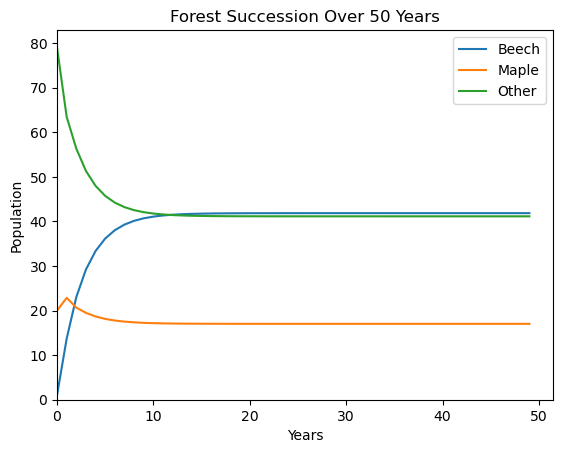

In [22]:
# plot the populations of each tree type over 50 years
years = 50
initial_population = [1, 20, 79]
population = forest_succession(years, initial_population)
plt.plot(population[:, 0], label='Beech')
plt.plot(population[:, 1], label='Maple')
plt.plot(population[:, 2], label='Other')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Forest Succession Over 50 Years')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [ ]:
# this is the matrix model with copy-pasting from previous assignments, editing, and solving with CoPilot/ChatGPT
def tree_succession(years):
    # Initial populations
    initial_Beech = 1
    initial_Maple = 20
    initial_Other = 79

    # Transition matrix (each column should sum to 1 if it's a Markov model)
    A = np.array([
        [0.8, 0.1, 0.1],
        [0.25, 0.15, 0.6],
        [0.1, 0.25, 0.65]
    ])

    # Initial population vector
    n_t = np.array([initial_Beech, initial_Maple, initial_Other])

    # Create lists to store populations over time
    Beech_population = [n_t[0]]
    Maple_population = [n_t[1]]
    Other_population = [n_t[2]]

    # Loop through the number of years to calculate populations
    for year in range(years):
        n_t = np.dot(A, n_t)
        Beech_population.append(n_t[0])
        Maple_population.append(n_t[1])
        Other_population.append(n_t[2])

    return Beech_population, Maple_population, Other_population


# Example usage:
Beech, Maple, Other = tree_succession(20)
print("Beech:", Beech)
print("Maple:", Maple)
print("Other:", Other)

Beech: [np.int64(1), np.float64(10.7), np.float64(19.27), np.float64(24.87275), np.float64(28.641475000000003), np.float64(31.168840625000005), np.float64(32.8642744375), np.float64(34.0015845921875), np.float64(34.76450379109375), np.float64(35.27627754278516), np.float64(35.61958045574805), np.float64(35.84987145673113), np.float64(36.00435294568672), np.float64(36.10798066160677), np.float64(36.17749516188419), np.float64(36.224126178556844), np.float64(36.25540672732361), np.float64(36.27639002987562), np.float64(36.29046583747325), np.float64(36.29990802890305), np.float64(36.30624194462182)]
Maple: [np.int64(20), np.float64(50.65), np.float64(44.1425), np.float64(41.693875000000006), np.float64(39.915593750000006), np.float64(38.732315312500006), np.float64(37.937879890625005), np.float64(37.40501291171876), np.float64(37.04755704183594), np.float64(36.807772338408206), np.float64(36.64692236253213), np.float64(36.53902260359367), np.float64(36.46664237437648), np.float64(36.4180

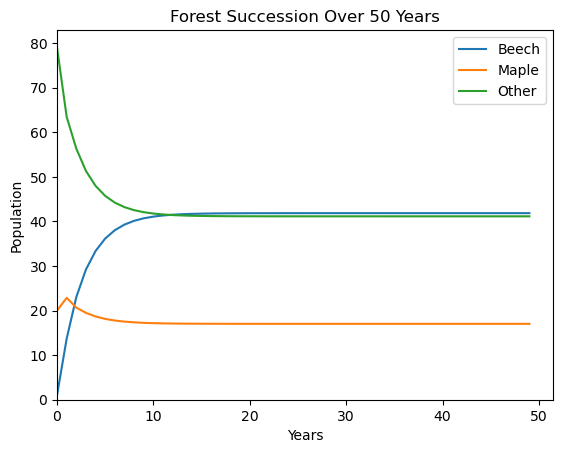

In [23]:
# plot the results
years = 50
initial_population = [1, 20, 79]
population = forest_succession(years, initial_population)
plt.plot(population[:, 0], label='Beech')
plt.plot(population[:, 1], label='Maple')
plt.plot(population[:, 2], label='Other')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Forest Succession Over 50 Years')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()
plt.show()

{
  "questions": [
    {
      "question": "What is the stationary state distribution of this population?",
      "answer": "The stationary state distribution of this population is equal to 1."
    },
    {
      "question": "What is the probability that a randomly selected individual from this population at year 50 is a maple?",
      "answer": "The probability that a randomly selected individual from this population at year 50 is a maple is 17%."
    }
  ]
}


In [ ]:
# butterfly metapopulation problem with probability
# Create a 4x4 matrix model to calculate the probabilities of butterflies populating a large patch and a small patch/going extinct in both
# create a definition for butterfly extinction
# write parameters
# extinction rate for Patch A= e_A = 0.3
# extinction rate for Patch B= e_B = 0.13
# z= zero or extinct
# p= populated
def butterfly_extinction(years):
    # Initial state probabilities (start with patch A and B both populated)
    z_z = 0  # both extinct
    z_p = 0  # A extinct, B populated
    p_z = 0  # A populated, B extinct
    p_p = 1  # both populated
    initial_population = [z_z, z_p, p_z, p_p]

    # Transition matrix (columns sum to 1 for a Markov process)
    A = np.array([
        [1,     0.029, 0.13,  0.0039],
        [0,     0.95,  0.0026, 0.13],
        [0,     0.006, 0.85,  0.026],
        [0,     0.019, 0.017, 0.84]
    ])

    # Initial population vector
    n_t = np.array(initial_population)

    # Create lists to store populations over time
    z_z_list = [n_t[0]]
    z_p_list = [n_t[1]]
    p_z_list = [n_t[2]]
    p_p_list = [n_t[3]]

    # Loop through the number of years to calculate populations
    for year in range(years):
        n_t = np.dot(A, n_t)
        z_z_list.append(n_t[0])
        z_p_list.append(n_t[1])
        p_z_list.append(n_t[2])
        p_p_list.append(n_t[3])

    return z_z_list, z_p_list, p_z_list, p_p_list


# Example usage:
z_z, z_p, p_z, p_p = butterfly_extinction(50)
print("z_z:", z_z)
print("z_p:", z_p)
print("p_z:", p_z)
print("p_p:", p_p)

z_z: [np.int64(0), np.float64(0.0039), np.float64(0.014325999999999998), np.float64(0.0296530572), np.float64(0.04859945432316), np.float64(0.07015740859877152), np.float64(0.09353745721937759), np.float64(0.11812385860855171), np.float64(0.14343886125803998), np.float64(0.16911410634069093), np.float64(0.19486776541202758), np.float64(0.22048628538185394), np.float64(0.2458098318082514), np.float64(0.2707206983579859), np.float64(0.2951340930250115), np.float64(0.31899082691095576), np.float64(0.3422515243190218), np.float64(0.3648920478631658), np.float64(0.38689989270215197), np.float64(0.40827135266871106), np.float64(0.4290093002393352), np.float64(0.4491214538096438), np.float64(0.46861903108303193), np.float64(0.48751570774222275), np.float64(0.5058268169206697), np.float64(0.5235687381040307), np.float64(0.540758434601454), np.float64(0.5574131071409002), np.float64(0.5735499378726382), np.float64(0.5891859044413931), np.float64(0.6043376480771908), np.float64(0.619021383072679

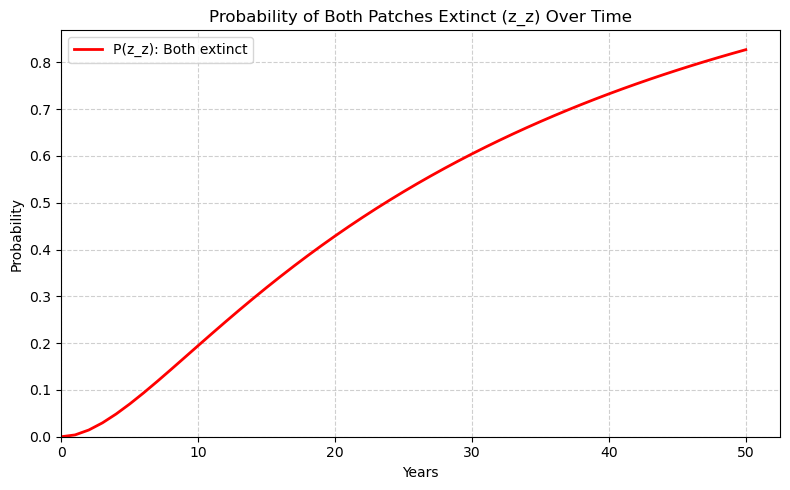

In [28]:
# create a plot for the probability of z_z
plt.figure(figsize=(8, 5))
plt.plot(range(years + 1), z_z, label='P(z_z): Both extinct', color='red', linewidth=2)
plt.xlabel('Years')
plt.ylabel('Probability')
plt.title('Probability of Both Patches Extinct (z_z) Over Time')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
z_z, z_p, p_z, p_p = butterfly_extinction(50)
print(f"Probability both A and B extinct after 50 years: {z_z[-1]:.4f}")

Probability both A and B extinct after 50 years: 0.8269


{
  "question": "What is the probability that both plots will be extinct after 50 years?",
  "answer": "The probability that both plots will be extinct after 50 years is around 80%."
}
